In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

C:\Users\saras\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset

In [2]:
df = pd.read_csv("B:\Code\Github Projects\House-Price-Prediction\housePrice.csv")

# EDA and Preprocessing

In [3]:
# EDA.1 -> Checking the head of df
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
# EDA.2 -> Checking rows, columns and name of columns
rows, columns = df.shape
print(f'rows: {rows} \n columns: {columns}')
print(df.columns)

rows: 3479 
 columns: 8
Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')


In [5]:
# EDA.3 -> Checking types of columns
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [6]:
# Cleaning.1 -> Changing the format and type of "Area" values
df["Area"] = df["Area"].astype("str").replace('\D', '', regex=True).astype('int64')

In [7]:
# EDA.4 -> Statistical summary of data
df.describe(include="all")

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
count,3.479000e+03,3479.000000,3479,3479,3479,3456,3.479000e+03,3.479000e+03
unique,NaN,NaN,2,2,2,192,NaN,NaN
top,NaN,NaN,True,True,True,Punak,NaN,NaN
freq,NaN,NaN,2950,3182,2739,161,NaN,NaN
mean,8.744000e+06,2.079908,NaN,NaN,NaN,NaN,5.359023e+09,1.786341e+05
std,3.167266e+08,0.758275,NaN,NaN,NaN,NaN,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,NaN,NaN,NaN,NaN,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,NaN,NaN,NaN,NaN,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,NaN,NaN,NaN,NaN,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,NaN,NaN,NaN,NaN,6.000000e+09,2.000000e+05


In [8]:
# EDA.5 -> Checking if there are missing values
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [9]:
# Cleaning.2 -> Dropping Adress Null Values
df.dropna(subset=["Address"], inplace=True)

In [10]:
# EDA.6 -> Checking if there are duplicates
df.duplicated().sum()

208

In [11]:
# Cleaning.3 -> Removing duplicates to ensure the analysis are not skewed by repeated data
df.drop_duplicates(inplace=True)

Text(0, 0.5, 'Addresses')

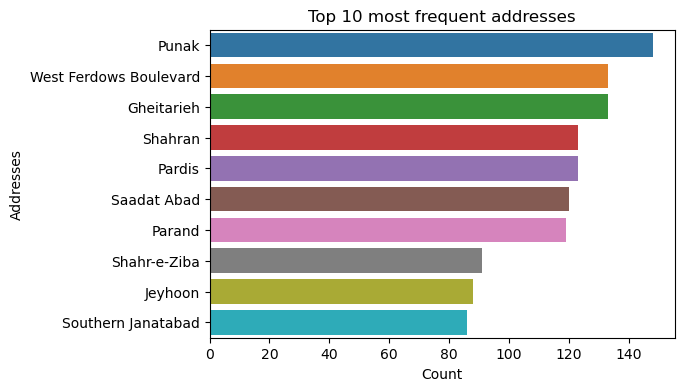

In [12]:
# EDA.7 -> Retrieve and display the top 10 most frequent addresses from the dataset
address_counts = df['Address'].value_counts().reset_index().head(10)
address_counts.columns = ['addresses', 'count']
plt.figure(figsize=(6,4)) 
sns.barplot(data=address_counts, x='count', y='addresses')
plt.title('Top 10 most frequent addresses')
plt.xlabel('Count')
plt.ylabel('Addresses')

In [13]:
# Cleaning.4 -> Label Encoding
encoder = preprocessing.LabelEncoder()
df['Address'] = encoder.fit_transform(df['Address'])

df['Parking'] = df['Parking'].astype(int)
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

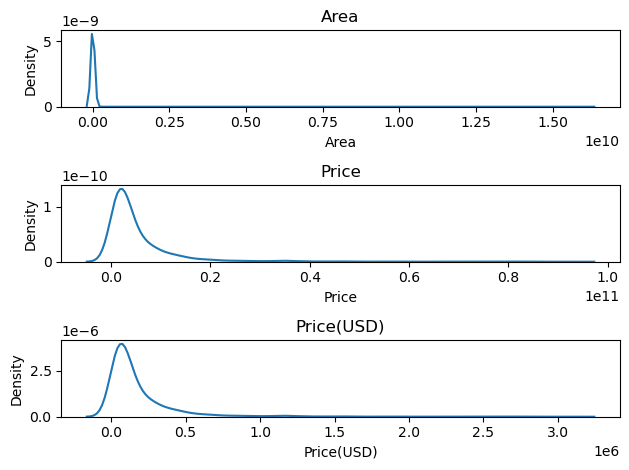

In [14]:
# EDA.8 -> Plotting KDE diagrams to visualize the distribution of columns with continuous values
for i, col in enumerate(["Area", "Price", "Price(USD)"]):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

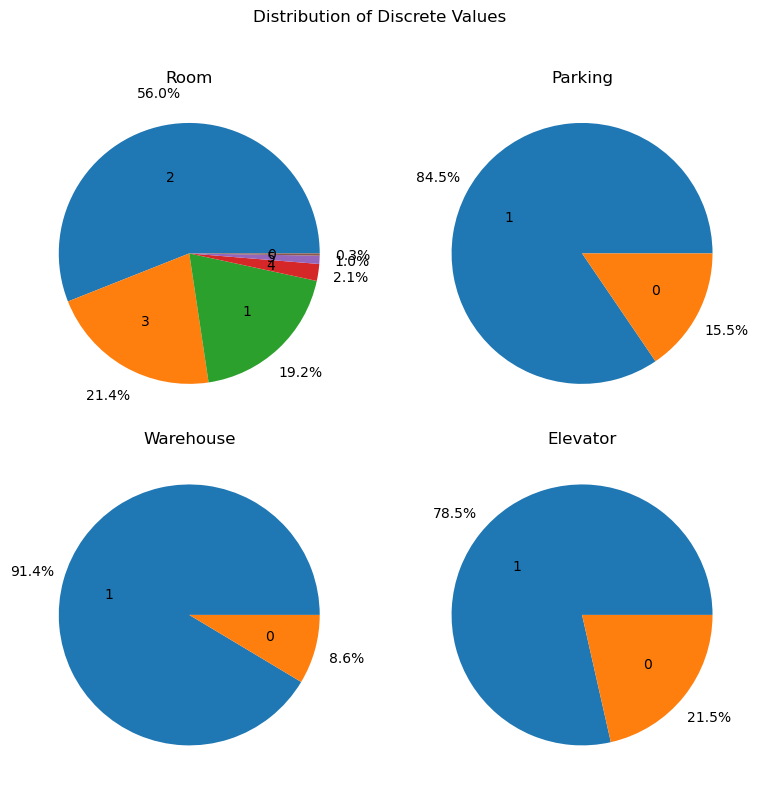

In [15]:
# EDA.9 -> Plotting Pie charts to visualize the distribution of columns with discrete values
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle('Distribution of Discrete Values')

for i, col in enumerate(["Room", "Parking", "Warehouse", "Elevator"]):
    ax = axs[i // 2, i % 2]
    sizes = df[col].value_counts().values
    labels = df[col].value_counts().index
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
           pctdistance=1.25, labeldistance=.6)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

In [16]:
# Data cleaning.5-1 -> Calculate z-scores for 'Room' within each 'Area' group and for 'Area' within each 'Address' group
threshold = 3
df['room_z_score'] = df.groupby(['Area'])['Room'].transform(lambda x: stats.zscore(x))
df['area_z_score'] = df.groupby(['Address'])['Area'].transform(lambda x: stats.zscore(x))

df['room_z_score'].fillna(0, inplace=True)
df['area_z_score'].fillna(0, inplace=True)

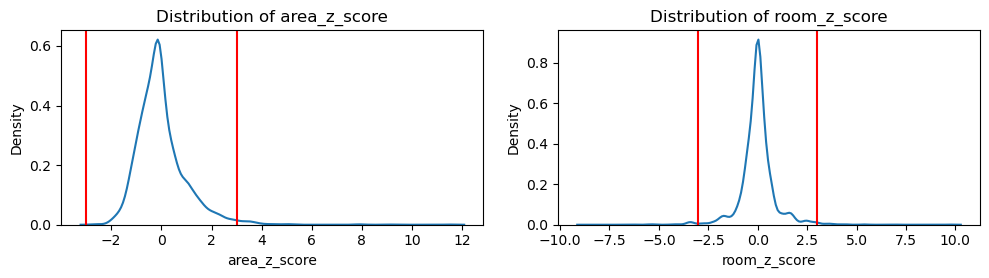

In [17]:
# EDA.10 -> Plotting KDE plots to visualize the distribution of area and room z-scores with threshold lines
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

for i, col in enumerate(["area_z_score", "room_z_score"]):
    sns.kdeplot(df[col], ax=axs[i])
    axs[i].set_title(f"Distribution of {col}")
    
    # Indicating the threshold
    axs[i].axvline(threshold, color='r', label=f'Threshold: {threshold}')
    axs[i].axvline(-threshold, color='r')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
# Data cleaning.5-2 -> Identifying outliers based on z-scores for 'Room' and 'Area'
df['room_outlier'] = False
df['area_outlier'] = False
df.loc[(df['room_z_score'] > threshold) | (df['room_z_score'] < (-1*threshold)), 'room_outlier'] = True
df.loc[(df['area_z_score'] > threshold) | (df['area_z_score'] < (-1*threshold)), 'area_outlier'] = True

In [19]:
# EDA.11 -> Checking the detected outliers out of Curiosity

# Inverse transform the encoded labels to get original address names
df['Address'] = df['Address'].astype(int)
ad_names = encoder.inverse_transform(df['Address'])
df.insert(5, 'Address Name', ad_names)

df.loc[df['room_outlier'] | df['area_outlier']].drop(['Address', 'room_z_score', 'area_z_score'], axis=1)

,Area,Room,Parking,Warehouse,Elevator,Address Name,Price,Price(USD),room_outlier,area_outlier
70,90,1,0,1,0,Pakdasht KhatunAbad,8.500000e+08,28333.33,True,False
87,140,1,0,0,0,Shahryar,5.800000e+08,19333.33,True,False
101,75,1,1,1,1,Shahrake Qods,6.500000e+08,21666.67,True,False
190,320,4,1,1,1,Saadat Abad,2.400000e+10,800000.00,False,True
230,75,1,1,1,1,Central Janatabad,3.000000e+09,100000.00,True,False
...,...,...,...,...,...,...,...,...,...,...
3334,285,4,1,1,1,Shahrake Gharb,2.850000e+10,950000.00,False,True
3338,89,3,1,1,1,Parand,4.300000e+08,14333.33,True,False
3360,74,1,0,1,1,Parand,4.800000e+08,16000.00,True,False
3409,83,3,0,0,0,Atabak,1.286500e+09,42883.33,True,False


In [20]:
# Data cleaning.5-3 -> Removing detected outliers
df = df.loc[(df['room_outlier'] == False) & (df['area_outlier'] == False)]

In [21]:
# Data cleaning.6 -> Removing unnecessary columns
df.drop(['Address Name', 'room_z_score', 'area_z_score', 'room_outlier', 'area_outlier'], axis=1, inplace=True)

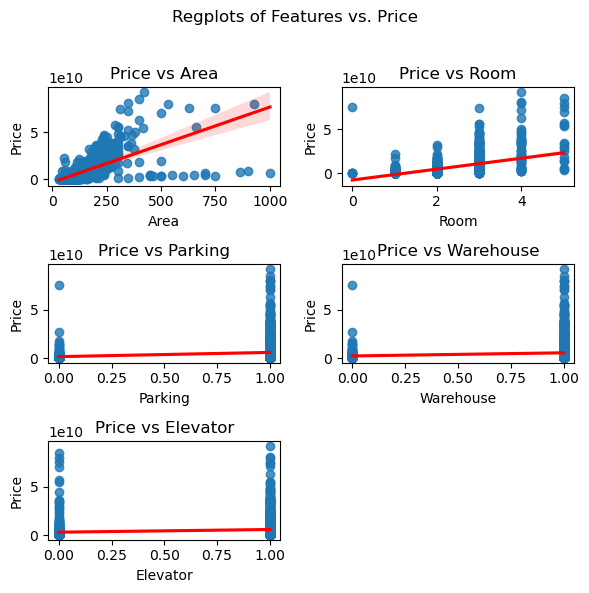

In [22]:
# EDA.12 -> Plot regression lines to examine the relationship between multiple features and 'Price'

fig, axs = plt.subplots(3, 2, figsize=(6, 6))
fig.suptitle('Regplots of Features vs. Price')

# List of features to plot against 'Price'
features = ["Area", "Room", "Parking", "Warehouse", "Elevator"]

for i, col in enumerate(features):
    ax = axs[i // 2, i % 2]  
    sns.regplot(data=df, x=col, y="Price", line_kws=dict(color="r"), ax=ax)
    ax.set_title(f"Price vs {col}")

# Hide the empty subplot (if there are fewer features than subplot slots)
if len(features) < axs.size:
    for j in range(len(features), axs.size):
        axs[j // 2, j % 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [23]:
# Defining features and label
X = df[["Area","Room","Parking","Warehouse","Elevator","Address"]].to_numpy()
y = df[["Price","Price(USD)"]].to_numpy()

In [24]:
# Normalization 
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

# Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Modelling:

## Modelling.1 -> Random Forest

In [26]:
# Training a Random Forest model
rfregr = RandomForestRegressor()
rfregr.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# Evaluating the Random Forest model
rf_y_pred = rfregr.predict(X_test)
r2_score(y_test, rf_y_pred)

0.7060722825563617

## Modelling.2 -> Decision Tree

In [28]:
# Training a Decision Tree model
dtregr = DecisionTreeRegressor(max_depth=3)
dtregr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [29]:
# Evaluating the Desicion Tree model
dt_y_pred = dtregr.predict(X_test)
r2_score(y_test, dt_y_pred)

0.6046418177931746

## Modelling.3 ->Linear Regression

In [30]:
# Training a Linear Regression model
lrregr = LinearRegression()
lrregr.fit(X_train, y_train)

LinearRegression()

In [31]:
# Evaluating the Linea Regression model
lr_y_pred = lrregr.predict(X_test)
r2_score(y_test,lr_y_pred)

0.5128812816651818

### According to R2 scores, it is concluded that the random forest model has the highest R2-score.